In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import feature
from skimage.measure import label
from skimage.color import label2rgb
import math
import imutils
from tqdm import tqdm
import timeit

In [2]:
from utils.helpers import *
import puzzles
from puzzles import puzzle_functions as pf
from puzzles.piece_class import Piece
from puzzles.puzzle_class import Jigsaw
np.set_printoptions(precision=1)

---

## Reading in the image and initialisation:

Run help(Jigsaw) to get more information about the Jigsaw class, and help(Piece) for the Piece class.

<Figure size 432x288 with 0 Axes>

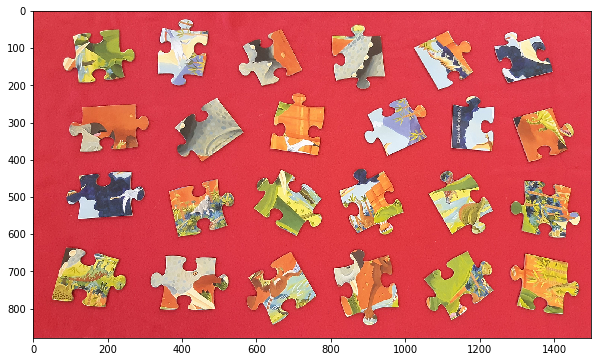

879 1500


In [21]:
img = cv2.imread("images/light2.jpg")
look(img)
N = img.shape[0]
M = img.shape[1]
print(N,M)

In [22]:
# The upper and lower ranges of the background colour to be subtracted

lower_red = np.array([110, 15, 15])
upper_red = np.array([240, 80, 95])

In [23]:
# Create Jigsaw object
# Change printing to True to get output images while it runs (warning, there will be a lot)

jig = Jigsaw(img, lower_red, upper_red, printing=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.07it/s]


In [24]:
# Check that number of border and interior pieces adds up to 24

print(len(jig.border))
print(len(jig.inners))

16
8


In [36]:
# To view the image of an individual piece:

see(jig.border[4].get_picture(jig))

---

## Interior piece matching:

In [28]:
piece1 = jig.inners[2]
piece2 = jig.inners[4]
s1 = 0
s2 = 3
ellipse1 = pf.fit_ellipse(piece1.sides[s1], jig.image.shape)
ellipse2 = pf.fit_ellipse(piece2.sides[s2], jig.image.shape)

<Figure size 432x288 with 0 Axes>

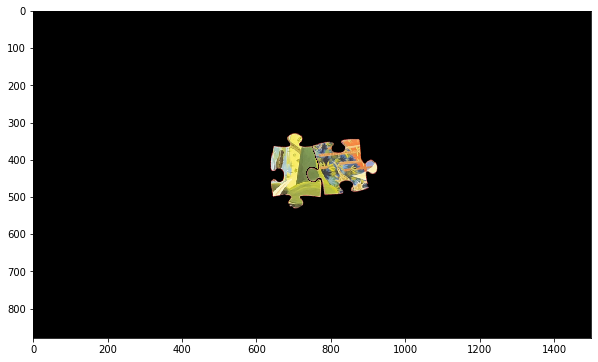

3149.3301847707826

In [29]:
pf.ellipse_score(jig, piece1, piece2, ellipse1, ellipse2, s1, s2, move_imgs=True)

---

## Border solving:

In [30]:
def get_acc(ordering):
    correct = 0
    n = len(jig.border)
    true_order = np.array([0,13,15,4,2,11,3,5,6,12,10,14,9,8,1,7,0])
    for i in range(n-1):
        curr = ordering[i]
        match = ordering[i+1]
        index = np.where(true_order==curr)[0][0]
        true_match = true_order[index+1]
        if match == true_match:
            correct += 1

    accuracy = (correct/n)*100
    print("Border match accuracy: " + str(accuracy) + "%")
    return accuracy

Correct ordering:
0->13->15->4->2->11->3->5->6->12->10->14->9->8->1->7->0

Corners: 2, 5, 7, 9

In [31]:
table = jig.get_border_scores()

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.94it/s]


In [32]:
ordering = pf.get_border_ordering(table, len(jig.border))
print(ordering)
get_acc(ordering)

[12, 6, 13, 15, 4, 2, 10, 14, 9, 8, 3, 5, 0, 1, 7, 11]
Border match accuracy: 50.0%


50.0

In [33]:
su = 0
border_length = len(jig.border)
scores = np.copy(table)
maxa = 0

for s in range(border_length):
    scores = np.copy(table)
    ordering = pf.cycle(scores, s, border_length+1)
    if len(ordering) > 15:
        acc = get_acc(ordering)
        su += acc
        if acc > maxa:
            maxa = acc
        
su /= 16
print("average:",su)
print("max:", maxa)

Border match accuracy: 25.0%
Border match accuracy: 25.0%
Border match accuracy: 25.0%
Border match accuracy: 62.5%
Border match accuracy: 56.25%
Border match accuracy: 50.0%
Border match accuracy: 56.25%
Border match accuracy: 43.75%
Border match accuracy: 37.5%
Border match accuracy: 62.5%
Border match accuracy: 50.0%
Border match accuracy: 43.75%
Border match accuracy: 31.25%
average: 35.546875
max: 62.5


In [34]:
pf.assemble_border(jig, ordering, saving=True)

APPROX
APPROX
APPROX
